#### Information about dataset<br>

- Square_Footage: The size of the house in square feet. Larger homes typically have higher prices.
- Num_Bedrooms: The number of bedrooms in the house. More bedrooms generally increase the value of a home.
- Num_Bathrooms: The number of bathrooms in the house. Houses with more bathrooms are typically priced higher.
- Year_Built: The year the house was built. Older houses may be priced lower due to wear and tear.
- Lot_Size: The size of the lot the house is built on, measured in acres. Larger lots tend to add value to a property.
- Garage_Size: The number of cars that can fit in the garage. Houses with larger garages are usually more expensive.
- Neighborhood_Quality: A rating of the neighborhood’s quality on a scale of 1-10, where 10 indicates a high-quality neighborhood. Better - neighborhoods usually command higher prices.
- House_Price (Target Variable): The price of the house, which is the dependent variable you aim to predict.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('house_price_regression_dataset.csv')
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [6]:
df.isna().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

No Null values

In [5]:
df.duplicated().sum()

np.int64(0)

No duplicate records 

In [7]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


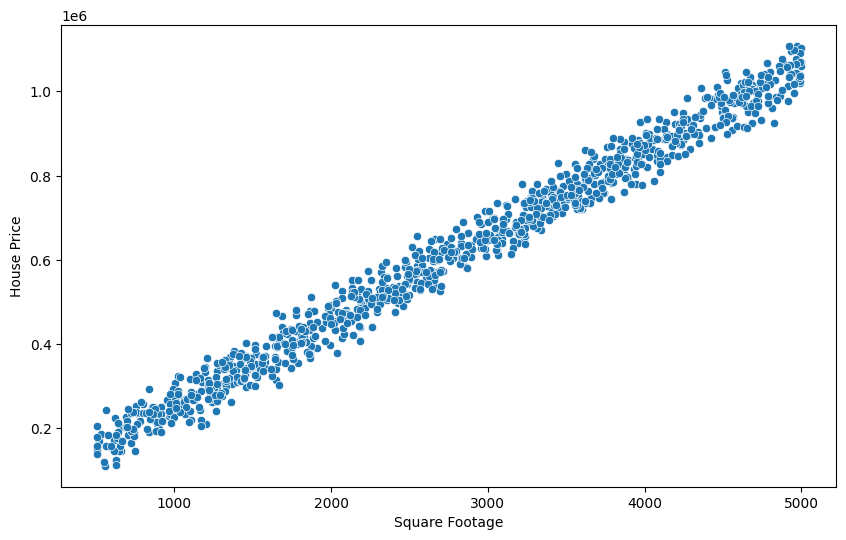

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Square_Footage'],y=df['House_Price'])
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.show()

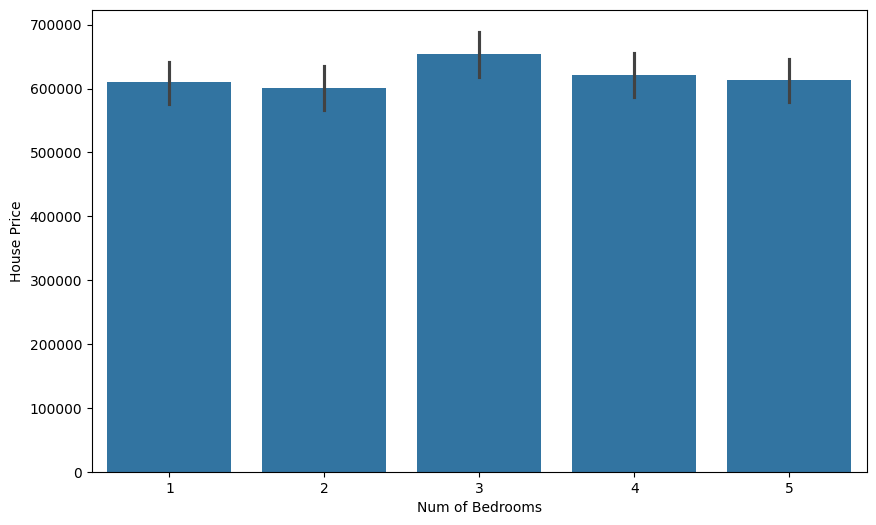

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Num_Bedrooms'],y=df['House_Price'])
plt.xlabel('Num of Bedrooms')
plt.ylabel('House Price')
plt.show()

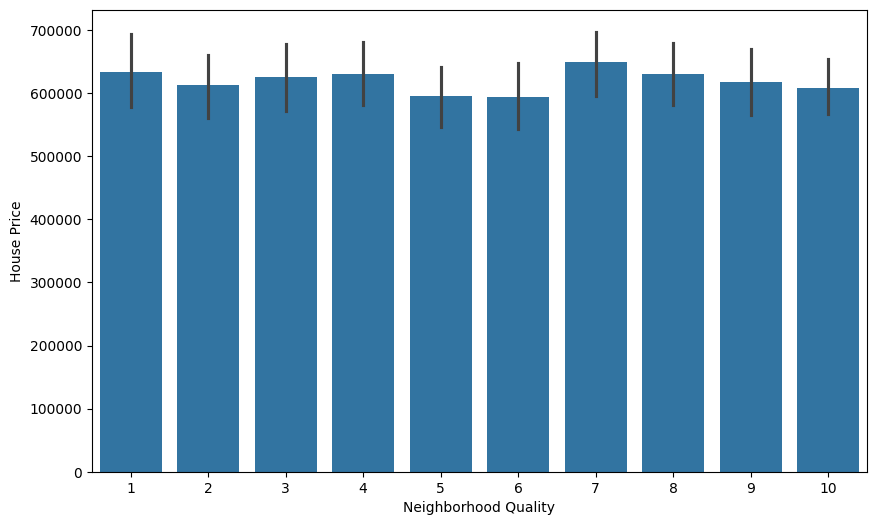

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Neighborhood_Quality'],y=df['House_Price'])
plt.xlabel('Neighborhood Quality')
plt.ylabel('House Price')
plt.show()

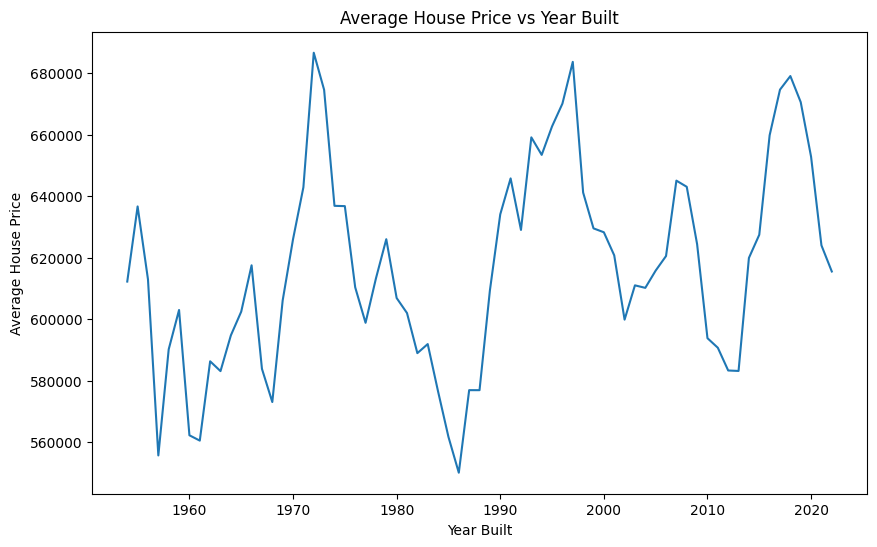

In [28]:
year_price = df.groupby("Year_Built")["House_Price"].mean()

plt.figure(figsize=(10,6))
plt.plot(year_price.index, year_price.rolling(window=5).mean())
plt.xlabel("Year Built")
plt.ylabel("Average House Price")
plt.title("Average House Price vs Year Built")
plt.show()

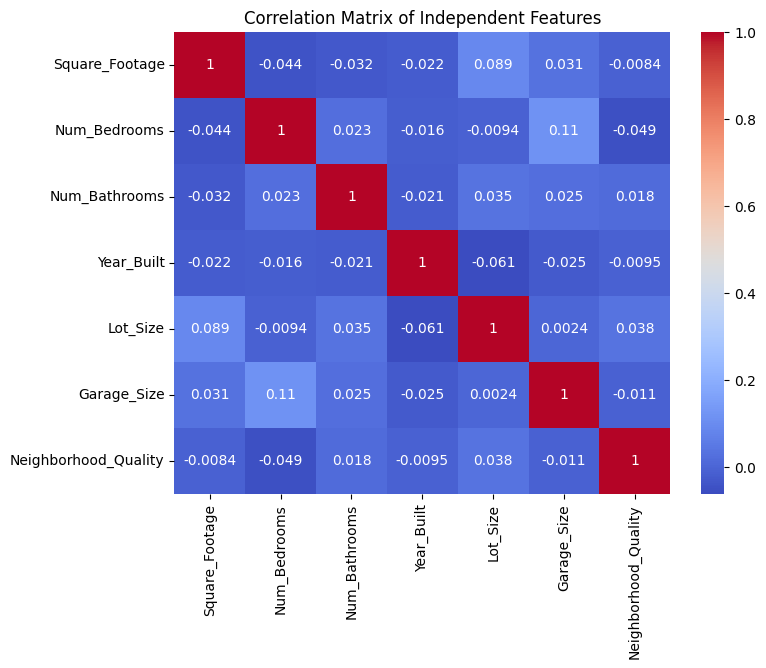

In [18]:
corr = df.drop("House_Price", axis=1).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Independent Features")
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [32]:
X = df.drop(columns=['House_Price'])
X

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
0,1360,2,1,1981,0.599637,0,5
1,4272,3,3,2016,4.753014,1,6
2,3592,1,2,2016,3.634823,0,9
3,966,1,2,1977,2.730667,1,8
4,4926,2,1,1993,4.699073,0,8
...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10
996,3179,1,2,1999,2.977123,1,10
997,2606,4,2,1962,4.055067,0,2
998,4723,5,2,1950,1.930921,0,7


In [33]:
y = df['House_Price']
y

0      2.623829e+05
1      9.852609e+05
2      7.779774e+05
3      2.296989e+05
4      1.041741e+06
           ...     
995    7.014940e+05
996    6.837232e+05
997    5.720240e+05
998    9.648653e+05
999    7.425993e+05
Name: House_Price, Length: 1000, dtype: float64

In [34]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [36]:
model_pipe = Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('model',LinearRegression())
])

In [37]:
model_pipe.fit(X_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None


In [38]:
y_pred = model_pipe.predict(X_test)

In [40]:
score = r2_score(y_test,y_pred)
print('The r2 score of model is : ',score)

The r2 score of model is :  0.9984263636823413


In [41]:
mse = mean_squared_error(y_test,y_pred)
print('MSE : ',mse)

MSE :  101434798.50563647


In [42]:
print('RMSE : ',np.sqrt(mse))

RMSE :  10071.484424137112


In [50]:
feature_names = X_train.columns

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model_pipe.named_steps['model'].coef_
})

coef_df.sort_values(by='Coefficient',ascending=False)

,Feature,Coefficient
0,Square_Footage,249787.914843
3,Year_Built,20662.121612
4,Lot_Size,19088.111033
1,Num_Bedrooms,14524.734398
2,Num_Bathrooms,6695.906775
5,Garage_Size,4219.449419
6,Neighborhood_Quality,335.247488


In [48]:
print('Intercept : ',model_pipe.named_steps['model'].intercept_)

Intercept :  618576.0544203854


In [53]:
# Predicting new data
new_house = pd.DataFrame({
    "Square_Footage": [2500],
    "Num_Bedrooms": [3],
    "Num_Bathrooms": [2],
    "Year_Built": [2015],
    "Lot_Size": [3.0],
    "Garage_Size": [1],
    "Neighborhood_Quality": [7]
})

predicted_price = model_pipe.predict(new_house)
print(f"Predicted House Price: {predicted_price[0]:,.2f}")


Predicted House Price: 587,893.36
